<a href="https://colab.research.google.com/github/uzair011/PyTorch-fndmntl/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
what_we_are_covering = {
    1: "Data (prepare and load).",
    2: "Build model.",
    3: "Fitting the model to data (training).",
    4: "Making predictions and evaluating the model (inference).",
    5: "Saving and loading the model.",
    6: "Putting it all together."
}
what_we_are_covering

{1: 'Data (prepare and load).',
 2: 'Build model.',
 3: 'Fitting the model to data (training).',
 4: 'Making predictions and evaluating the model (inference).',
 5: 'Saving and loading the model.',
 6: 'Putting it all together.'}

In [2]:
import torch
from torch import nn # nn contains all of the building blocks for neural networks.
import matplotlib.pyplot as plt

# check pytorch version
torch.__version__

'2.0.1+cu118'

## Data (Preparing and Loading)

* In maching learning data can be almost anything...
  1. Execl spread sheet
  2. Images
  3. Videos
  4. Texts
  5. Audio files
  5. DNA...

   Main Concepts in ML
   1. Get data in to numerical representation.
   2. Build a model to learn patterns in the model.


   * To showcase this, lets create some *KNOWN* data using linear regression formula.
   * Here we'll use a linear regression formula to create straight line with known *parameters*.



In [3]:
# create *known* parameters
weight = 0.8
bias = 0.3

# create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

print(X[:10])
print("")
print(y[:10])

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])

tensor([[0.3000],
        [0.3160],
        [0.3320],
        [0.3480],
        [0.3640],
        [0.3800],
        [0.3960],
        [0.4120],
        [0.4280],
        [0.4440]])


In [4]:
len(X), len(y)

(50, 50)

## Splitting data into training and testing sets (one of the core concepts in ML, DL)



In [5]:
# creating a training and test set with our data

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

Visualizing the data.
explorer's moto :  "Visualize, visualize, visualize....."

In [6]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     prediction=None):
  """Plots trainning data, testing data and compares predictions..."""

  plt.figure(figsize=(10, 7))

  #plot training data into blue
  plt.scatter(train_data, train_labels, c="blue", s=4, label="training dataset")
  #plot testing data into yellow
  plt.scatter(test_data, test_labels, c="purple", s=4, label="testing dataset")

  # are there any predictions?
  if prediction is not None:
    #plot the predictions if they exist
    plt.scatter(test_data, prediction, c="red", s=4, label="predictions")

  # show the legend
  plt.legend(prop={"size": 14})

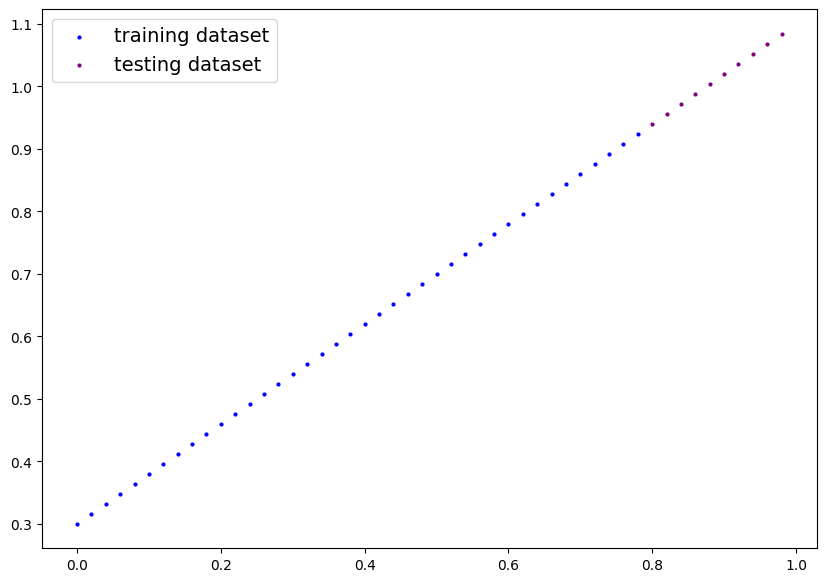

In [7]:
plot_predictions()

## Build a PyTorch Model

- what our model does...
  1. Start with random values (weight, bias)
  2. Look at the training data and try to better represent (or get closer to ) the ideal values ( The weight and bias we used to create the initial data)...

- How does it do so?
1. Radient descent
2. Back propergation

In [8]:
from torch import nn

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                           requires_grad=True,
                                           dtype = float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype = float))

    # Forward method to define the computation in the method.
  def forward(self, x: torch.Tensor) -> torch.Tensor:    # X is input data - training data.
      return self.weights * x + self.bias     # linear reqression formula.


## PyTorch model building essentials...

* `torch.nn` - Contains all of the buildings for computational graphs (a neural network can be considerd as computational graph.)
* `torch.nn.Parameter` - What parameters our model try and learn, often a pytorch layer from ``torch.nn`` will set these for us.
* `torch.nn.Module` - The base class for all neural networks. if you subclass it, then you should overwrite with def forward()
* `torch.optim` - This is were optimizers in pytorch live, they will help with gradient descent.
* `def forward()` - All `nn.module` subclasses require you to overwrite forward(), this method defines what happens in the forward computation.

### checking the contents of our pytorch model

wer can check our model parameters or what's inside by using `.parameters()`

In [9]:
# Create a random seed
torch.manual_seed(42)

# Creat an instance of the model (this is a subclass of nn.model)
model_0 = LinearRegressionModel()

# Check out the parameters of the model
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], dtype=torch.float64, requires_grad=True),
 Parameter containing:
 tensor([0.1288], dtype=torch.float64, requires_grad=True)]

In [10]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367], dtype=torch.float64)),
             ('bias', tensor([0.1288], dtype=torch.float64))])

In [11]:
weight, bias

(0.8, 0.3)

### Making predictions with `torch.inference_mode()`

To check our model's predictive power, lets check how it predicts `y_test` based on `x_test`.

When we pass data through our model, it's going to run it through the `forward()` method.

In [12]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.9400],
         [0.9560],
         [0.9720],
         [0.9880],
         [1.0040],
         [1.0200],
         [1.0360],
         [1.0520],
         [1.0680],
         [1.0840]]))

In [13]:
# Make predictions with our model

with torch.inference_mode():
  y_predict = model_0(X_test)

y_predict



# We can do similar with torch.no_grad(): BUT, torch.inference_mode() is preferrd...
# with torch.no_grad():
#   y_predict = model_0(X_test)

# y_predict

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], dtype=torch.float64)

In [14]:
y_test

tensor([[0.9400],
        [0.9560],
        [0.9720],
        [0.9880],
        [1.0040],
        [1.0200],
        [1.0360],
        [1.0520],
        [1.0680],
        [1.0840]])

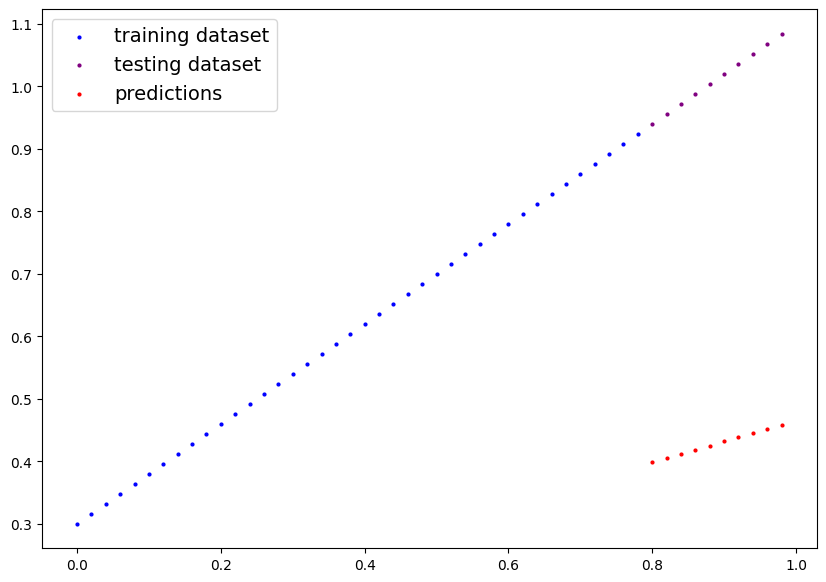

In [15]:
plot_predictions(prediction=y_predict)

# 3.
Training our model

- The idea of training is for a model to move from *UNKNOWN* parameters ( these maybe random ) to some *KNOWN* parameters OR in other words a poor representation to better representation of data.

- One way to messure how poor our model or how wrong the predictions are
to use a loss function.

- NOTE: A loss function is also called cost function or criterion. But, here we reffer to it as loss function.

-- Things we need to train --
1. **Loss Function** - A function to messure how wrong our model's predictions to the ideal output, lower is better.
2. **Optimizer** - Take into accout the loss of our model and adjusts the model's parameters (Eg: weight, bias in our case) to improve loss function.

Specifically for pytorch we need,
1. A training loop.
2. A testing loop.

In [16]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], dtype=torch.float64, requires_grad=True),
 Parameter containing:
 tensor([0.1288], dtype=torch.float64, requires_grad=True)]

In [17]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367], dtype=torch.float64)),
             ('bias', tensor([0.1288], dtype=torch.float64))])

In [18]:
# Setup a loss function
loss_function = nn.L1Loss()

# Setup an optimizer (SGD - Stochastic Gradient Descent)
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr=0.01) # lr - Learning Rate is an important hyper parameter that the engineer set.

### Building a training loop (and a testing loop) in Pytorch

* Some things to consider in a training loop... AND DO...
0. Loop through the data.
1. Forward pass ( this involves the data move through the `forward` functions ) to make predictions on data - also called forward propergation.
2. Calculate the loss ( Compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss Backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss(**Back Propergation**)
5. Optimizer step - Use the optimizer to adjust our model's to try and improve the loss(**Gradient Descent**)

In [29]:
torch.manual_seed(42)
# 1 epoch is 1 loop through the data.
epochs = 100

## Training

# 0. Loop throuth the data.
for epoch in range(epochs):
  # Set the model to training data.
  model_0.train() # Train mode in pytorch sets all the parameters that require gradients to require gradients.

  # 1. Forward pass
  y_prediction = model_0(X_train)

  # 2. Calculate loss
  loss = loss_function(y_prediction, y_train)
  # print(f"Loss: ", {loss})

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward - perform backpropergation on the loss with respect to parameters of the model.
  loss.backward()

  # 5. Step the optimizer
  optimizer.step()  # By default how the optimizer changes will accumulate through the loop... So, we have to zero them above in step 3 for the next iteration of the loop.


### Testing
  model_0.eval() # Turns off different settings in the model, not needed for evaluation/ testing ...
  with torch.inference_mode():  # Turns off gradient tracking and couple more settins in the background.
    # 1. Forward pass
    y_test_prediction = model_0(X_test)

    # 2. Calculate loss
    test_loss = loss_function(y_test_prediction, y_test)

    if epoch % 10 == 0:
      print(f"epoch:  {epoch}, Loss:  {loss}, Test loss:  {test_loss}")

      print(model_0.state_dict())

    # 3. Optimizer zero grad





Loss:  {tensor(0.0423, dtype=torch.float64, grad_fn=<MeanBackward0>)}
epoch:  0, Loss:  0.04225586197427286, Test loss:  0.0983710153982277
OrderedDict([('weights', tensor([0.5914], dtype=torch.float64)), ('bias', tensor([0.3873], dtype=torch.float64))])
Loss:  {tensor(0.0419, dtype=torch.float64, grad_fn=<MeanBackward0>)}
Loss:  {tensor(0.0416, dtype=torch.float64, grad_fn=<MeanBackward0>)}
Loss:  {tensor(0.0412, dtype=torch.float64, grad_fn=<MeanBackward0>)}
Loss:  {tensor(0.0409, dtype=torch.float64, grad_fn=<MeanBackward0>)}
Loss:  {tensor(0.0405, dtype=torch.float64, grad_fn=<MeanBackward0>)}
Loss:  {tensor(0.0402, dtype=torch.float64, grad_fn=<MeanBackward0>)}
Loss:  {tensor(0.0399, dtype=torch.float64, grad_fn=<MeanBackward0>)}
Loss:  {tensor(0.0395, dtype=torch.float64, grad_fn=<MeanBackward0>)}
Loss:  {tensor(0.0392, dtype=torch.float64, grad_fn=<MeanBackward0>)}
Loss:  {tensor(0.0388, dtype=torch.float64, grad_fn=<MeanBackward0>)}
epoch:  10, Loss:  0.03882742212265221, Test 

In [20]:
# Loss:  {tensor(0.0292, dtype=torch.float64, grad_fn=<MeanBackward0>)}
# Loss:  {tensor(0.0289, dtype=torch.float64, grad_fn=<MeanBackward0>)}

In [21]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5898], dtype=torch.float64)),
             ('bias', tensor([0.3883], dtype=torch.float64))])

In [22]:
"true values:", weight, bias

('true values:', 0.8, 0.3)

In [23]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5898], dtype=torch.float64)),
             ('bias', tensor([0.3883], dtype=torch.float64))])

In [24]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5898], dtype=torch.float64)),
             ('bias', tensor([0.3883], dtype=torch.float64))])

In [25]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5898], dtype=torch.float64)),
             ('bias', tensor([0.3883], dtype=torch.float64))])

In [26]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5898], dtype=torch.float64)),
             ('bias', tensor([0.3883], dtype=torch.float64))])

In [27]:
with torch.inference_mode():
  y_predict_new = model_0(X_test)

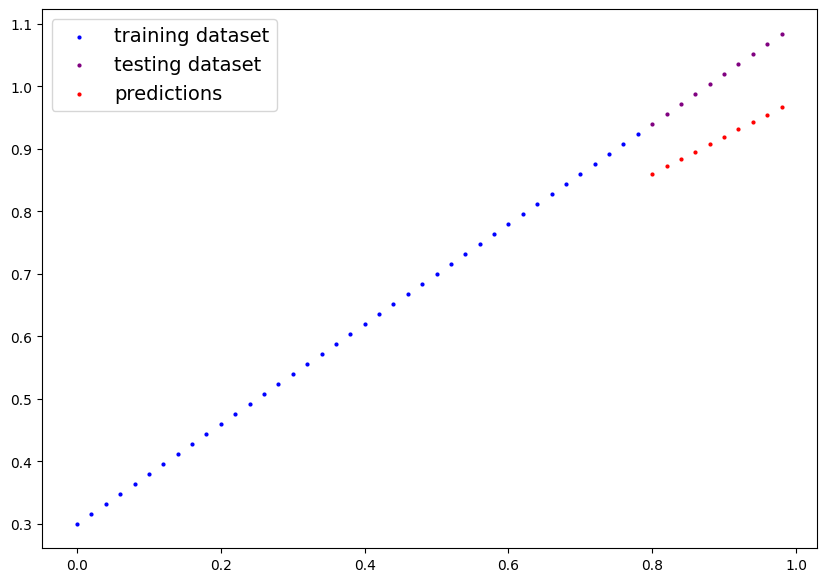

In [30]:
plot_predictions(prediction=y_predict_new)

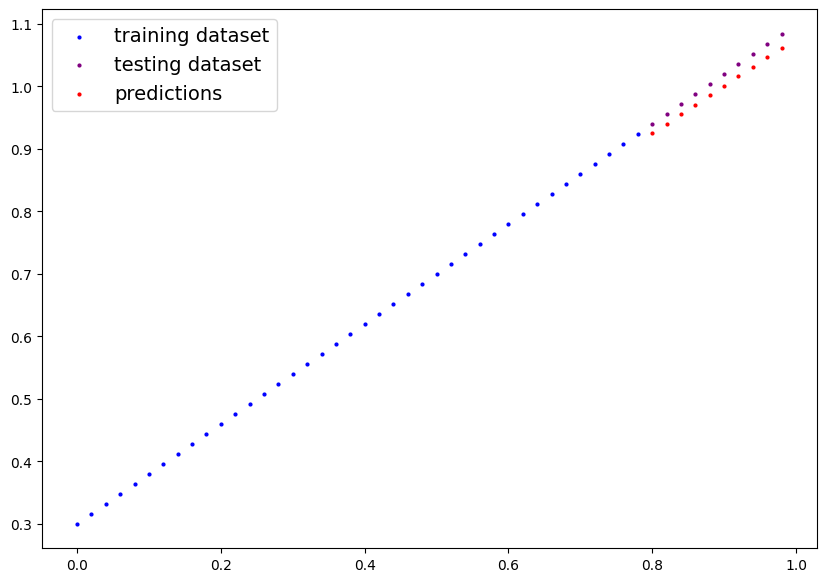

In [32]:
 plot_predictions(prediction=y_test_prediction);